## Multiple Linear Regression (All Features)
# AI Lab Task
# Student Name: Sneha Pandey
# Objective
The goal of Task 2 is to predict California housing prices using all available features. Multiple linear regression is applied to capture the influence of various features such as median income, total rooms, population, and more. This model aims to improve prediction performance compared to single-feature regression (Task 1).

### Step 1: Import Required Libraries
Explanation: We import libraries for:

Pandas/Numpy → Data manipulation

Matplotlib → Visualization

Sklearn → Loading dataset, splitting data, scaling, training, and evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import time

### Step 2: Load the California Housing Dataset
Explanation: We load the dataset and convert it to a DataFrame for easier manipulation. Each row represents a housing district; columns are features and the target (MedHouseVal).

In [3]:
# Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Display basic info
print("Dataset shape:", df.shape)
print("Columns:", df.columns)
df.head()

Dataset shape: (20640, 9)
Columns: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='str')


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Step 3: Feature Selection and Target Variable
Explanation:

X: All input features

y: Target variable (MedHouseVal) Using multiple features improves model accuracy over single-feature regression.

In [4]:

# All features except target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

### Step 4: Train-Test Split
Explanation: Training set trains the model; testing set evaluates performance on unseen data.

In [5]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Step 5: Feature Scaling
Explanation: Scaling ensures all features have similar ranges, preventing features with larger values from dominating the model.

In [6]:
# Standardize features for better model convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 6: Model Training
Explanation:

Linear Regression predicts a continuous target using multiple features.

Execution time helps check how long training takes for all features.

In [7]:
# Measure training time
start = time.time()

# Initialize and train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

end = time.time()
print(f"Execution time: {end - start:.2f} seconds")

Execution time: 0.01 seconds


### Step 7: Model Evaluation
Explanation:

MSE: Measures average squared prediction error (lower is better)

R² Score: Proportion of variance explained (closer to 1 is better)

In [8]:
# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.5558915986952444
R² Score: 0.5757877060324508


### Step 8: Model Interpretation
Explanation:

Intercept: Predicted MedHouseVal when all features = 0 In other words, if every feature (MedInc, HouseAge, AveRooms, etc.) were 0, the model would predict the house value equal to the intercept.

Coefficients: How much the target changes per unit change in each feature Each coefficient corresponds to one feature in your model.

It tells you how much the target (MedHouseVal) changes when that feature increases by 1 unit, keeping all other features constant.

In [9]:
# Intercept
print("Intercept:", model.intercept_)

# Coefficients for each feature
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coefficients)

Intercept: 2.071946937378881
      Feature  Coefficient
0      MedInc     0.854383
1    HouseAge     0.122546
2    AveRooms    -0.294410
3   AveBedrms     0.339259
4  Population    -0.002308
5    AveOccup    -0.040829
6    Latitude    -0.896929
7   Longitude    -0.869842


### Step 9: Visualization (Predicted vs Actual)
Explanation:

Scatter plot shows predicted vs actual values.

Red line is the ideal prediction line (perfect match).

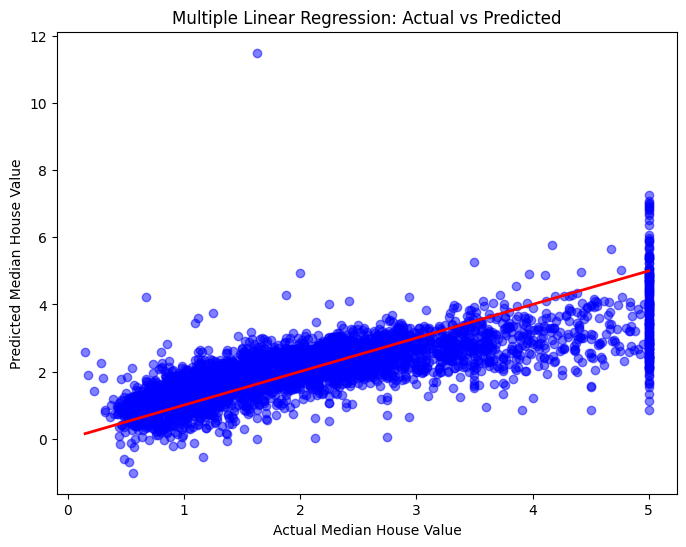

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()

### Step 10: Conclusion
Task 2 uses multiple features, improving prediction accuracy over single-feature regression.

Evaluation metrics: MSE is lower, R² is higher than Task 1.

Interpretation: Each coefficient explains the effect of a feature on MedHouseVal.

Visualization: Predicted values closely align with actual values, confirming good model fit.